James Telzrow \
2023-06-01 \
Warburton Lab \
Schrodinger Time Independent Equation with Quadratic Potential (Quantum Harmonic Oscillator)

## Introduction

This notebook describes the process of analytically solving the *Time-independent Schrodinger equation* for the ["Quantum Harmonic Oscillator"](https://en.wikipedia.org/wiki/Quantum_harmonic_oscillator).
It also contains code for finding and then plotting these analytical solutions as well as numeric solutions, given a set of energy levels, the "spring constant", and the mass of the particle/oscillator (and initial conditions in the numeric case).
If you aren't interested in the derivation of the analytical solutions and just wish to find and plot them, then scroll down to the section entitled **Plotting Analytical Solution**.
If you aren't interested in analytic solutions and are only concerned with numeric approximations, then scroll down to the section entitled **Numerical Solution**
The contents of this notebook are based partially on the following two sources:

* [Lecture 8: Quantum Harmonic Oscillator: Brute Force Methods](https://ocw.mit.edu/courses/8-04-quantum-physics-i-spring-2013/808334d09369e3a726f6f20d82315c20_MIT8_04S13_Lec08.pdf). *Professor Allan Adams*. *8.04: Quantum Mechanics*. *Spring 2013*. Massachusetts Institute of Technology: MIT OpenCouseWare, https://ocw.mit.edu/. License: Creative Commons BY-NC-SA.
* [Lecture 13: Delta Function Potential, Node Theorem, and Simple Harmonic Oscillator](https://ocw.mit.edu/courses/8-04-quantum-physics-i-spring-2016/ff9fdba4da09b783255583e2a61d1279_MIT8_04S16_LecNotes13.pdf). *Professor Barton Zwiebach*. *8.04: Quantum Mechanics*. *Fall 2016*. Massachusetts Institute of Technology: MIT OpenCouseWare, https://ocw.mit.edu/. License: Creative Commons BY-NC-SA.

Suppose there exists a particle in a one-dimensional space (that is, on the x-axis.)
Let this particle have mass $m$ and a definite quantity of energy $E$.
Let $x_0$ and $k$ be some fixed real numbers, and let the particle have potential energy $V(x) = \frac{k}{2}(x-x_0)^2$ when the particle is at point $x$.
(That is, the  potential energy of the particle is proportional to the squared distance between the particle itself and the point $x_0$).
Then this particle's wave functions $\psi(x)$ are those that satisfy the *Time-independent Schrodinger equation*:
$$
\begin{equation*}
E\psi(x) = -\frac{\hbar^2}{2m}\frac{d^2\psi(x)}{dx^2} + \frac{k}{2}(x-x_0)^2\psi(x)
\end{equation*}
$$
where $\hbar$ is the reduced Planck constant, $\hbar = \frac{h}{2\pi}$.

Now consider the equation for the potential energy of the particle:
$$
V(x) = \frac{k}{2}(x-x_0)^2
$$
Note that this is exactly the same as the potential energy of a harmonic oscillator centered at $x_0$ with spring constant $k$ and mass $m$.
Recall that the angular frequency $\omega$ of such a harmonic oscillator is given by $\omega = \sqrt{\frac{k}{m}}$, meaning that the constant $k$ is related to the angular frequency and mass of the harmoic oscillator by the equation 
$$
k = \omega^2m
$$
Thus we can say the same for the particle under consideration.
Therefore the Time-independent Schrodinger equation for this particle becomes
$$
\begin{equation*}
E\psi(x) = -\frac{\hbar^2}{2m}\frac{d^2\psi(x)}{dx^2} + \frac{\omega^2 m}{2}(x-x_0)^2\psi(x)
\end{equation*}
$$

## Analytical Solution

By rearranging the equation above, we can see that it is a linear second-order ordinary differential equation:
$$
\begin{equation}\tag{1}
\frac{\hbar^2}{2m}\frac{d^2\psi(x)}{dx^2} = 
\frac{\omega^2m}{2}(x-x_0)^2\psi(x) - E\psi(x) =
\bigg(\frac{\omega^2m}{2}(x-x_0)^2 - E\bigg)\psi(x)
\end{equation}
$$
However, the coefficient of $\psi(x)$ in this equation is not constant;
it is a function of $x$, the position of the particle.
There is no general method for solving such an equation, and some equations of this form cannot be solved analytically.
However, this particular equation does have an analytical solution, and we solve for it below.

We could cetainly begin solving Equation $(3)$ as-is, but it contains quite a few constants with dimensions.
So if we tried to solve it as it is written, all of our work would involve all of these constants, which would unnecessarily complicate things.
To work around, this, we can perform nondimensionalization, a process by which we remove physical dimensions from the equation by defining new variables in a clever way, and  then substituting them for existing variables.
(Additionally, many other resources that discuss the Schrodinger equation for the "quantum harmonic oscillator" perform this step, so we do it here as well for consistency.)

Let's consider the variable $(x - x_0)$.
It  has units of length in meters, and it is multiplied by $\frac{\omega^2 m^2}{\hbar^2}$.
Now let's consider the units of $\frac{\omega^2 m^2}{\hbar^2} = \frac{(2\pi)^2\text{freq}^2 m^2}{(2\pi)^2 h^2}$:
\begin{gather*}
\frac{\frac{1}{\text{seconds}}^2 \times \text{kilograms}^2}{\text{Joules}^2 \times \text{seconds}^2} = 
\frac{\frac{1}{\text{seconds}}^2\times \text{kilograms}^2}{(\text{kilograms}\times \text{meters}^2\times\frac{1}{\text{seconds}}^2)^2\times \text{seconds}^2} =
\frac{1}{\text{meters}^4}
\end{gather*}
which is one over length to the fourth.
Therefore, we define $\alpha$ to be
\begin{gather*}
    \bigg(\bigg(\frac{\omega^2 m^2}{\hbar^2}\bigg)^{-1}\bigg)^\frac{1}{4} = \bigg(\frac{\hbar^2}{\omega^2 m^2}\bigg)^\frac{1}{4} = \sqrt{\frac{\hbar}{\omega m}} = \alpha
\end{gather*}
then $\alpha$ has units of meters, and so we can divide $(x - x_0)$ by $\alpha$ to get our unitless length scale.
So we define 
\begin{gather*}
    u = \frac{(x - x_0)}{\sqrt{\frac{\hbar}{\omega m}}} = \frac{(x-x_0)}{\alpha}
\end{gather*}
and then we replace $(x - x_0)$ with $u\alpha$ in Equation $(1)$:
\begin{gather}\tag{2}
    \frac{d^2\psi(x)}{dx^2} = \bigg(\frac{\omega^2 m^2}{\hbar^2}(x - x_0)^2 - \frac{E2m}{\hbar^2}\bigg)\psi(x)
    \rightarrow
    \frac{d^2\psi(\alpha u)}{d(\alpha u)^2} = \bigg(\frac{\omega^2 m^2}{\hbar^2} \frac{\hbar}{\omega m}u^2 - \frac{E2m}{\hbar^2} \bigg)\psi(\alpha u)
    \rightarrow
    \frac{d^2\psi(\alpha u)}{d(\alpha u)^2} = \bigg(\frac{\omega m}{\hbar}u^2 - \frac{E2m}{\hbar^2} \bigg)\psi(\alpha u)
\end{gather}
Writing $\psi(\alpha u)$ and $\frac{d^2\psi(\alpha u)}{d(\alpha u)^2}$ is going to quickly lead to confusion and possibly mistakes.
So instead, let's define a function $\phi(u)$ such that
\begin{gather*}
    \phi(u) = \psi(\alpha u)
\end{gather*}
For  clarity, let's also define another function
\begin{gather*}
    f(u) = \alpha u
\end{gather*}
Then we have:
\begin{gather*}
    \phi(u) = \psi(\alpha u) = \psi(f(u)) \\
    \frac{d\phi(u)}{du} = \frac{d\psi(f(u))}{d(f(u))}\frac{df(u)}{du} = \frac{d\psi(f(u))}{d(f(u))}\alpha \\
    \frac{d^2\phi(u)}{du^2} = \frac{d}{du}\bigg(\frac{d\phi(u)}{du}\bigg) = \frac{d}{d(f(u))}\frac{d(f(u))}{du}\bigg(\frac{d\phi(u)}{du}\bigg) = \\
    \frac{d}{d(f(u))} \alpha \bigg( \frac{d\psi(f(u))}{d(f(u))}\alpha \bigg) = \frac{d^2\psi(f(u))}{d(f(u))^2} \alpha^2 \\
\end{gather*}
which implies that
\begin{gather*}
    \frac{1}{\alpha^2}\frac{d^2\phi(u)}{du^2} = \frac{d^2\psi(f(u))}{d(f(u))^2}
\end{gather*}

Now we apply these to Equation $(2)$ using substitution:
\begin{gather*}
    \frac{d^2\psi(\alpha u)}{d(\alpha u)^2} = \bigg(\frac{\omega m}{\hbar}u^2 - \frac{E2m}{\hbar^2}\bigg)\psi(\alpha u)
    \rightarrow
    \frac{1}{\alpha^2}\frac{d^2\phi(u)}{du^2} = \bigg(\frac{\omega m}{\hbar}u^2 - \frac{E2m}{\hbar^2}\bigg)\phi(u)
    \rightarrow \\
    \frac{d^2\phi(u)}{du^2} = \bigg(u^2 - \alpha^2\frac{E2m}{\hbar^2}\bigg)\phi(u)
    \rightarrow
    \frac{d^2\phi(u)}{du^2} = \bigg(u^2 - \frac{\hbar}{\omega m}\frac{E2m}{\hbar^2}\bigg)\phi(u)
    \rightarrow
\end{gather*}

\begin{gather}\tag{3}
    \frac{d^2\phi(u)}{du^2} = \bigg(u^2 - \frac{E2}{\omega\hbar}\bigg)\phi(u)
\end{gather}

Now let's consider the units of $\frac{2}{\omega \hbar}$:
\begin{gather*}
    \frac{2}{2\pi\times \text{freq}\times \text{Joules}\times \text{seconds}\times 2\pi}
    \rightarrow
    \frac{2}{2\pi\times \frac{1}{\text{seconds}}\times \text{Joules}\times \text{seconds}\times 2\pi}
    \rightarrow
    \text{Joules}^{-1}
\end{gather*}
that is, inverse Joules, so we can multiply $E$ by $\frac{2}{\omega \hbar}$ to get our unitless energy.
So we define $\epsilon = E\frac{2}{\omega \hbar}$, and we replace $E$ with $\frac{\epsilon \omega \hbar}{2}$ in Equation $(3)$:
\begin{gather}\tag{4}
    \frac{d^2\phi(u)}{du^2} = \bigg(u^2 - \frac{E2}{\omega \hbar}\bigg)\phi(u)
    \rightarrow
    \frac{d^2\phi(u)}{du^2} = (u^2 - \frac{\epsilon\omega\hbar}{2}\frac{2}{\omega\hbar})\phi(u)
    \rightarrow
    \frac{d^2\phi(u)}{du^2} = (u^2 - \epsilon)\phi(u)
\end{gather}

Now, Equation $(4)$ is significantly "cleaner" than Equation $(1)$.
(Again, we could have simply started solving $(1)$, but we would have had a **lot** of symbols in our expressions, which would make it hard to read and leaves plenty of room for making mistakes.)

Now let's start actually solving the linear second order variable coefficient ordinary differential equation.
Note that as $u$ approaches $\pm\infty$, we have
\begin{gather*}
    \frac{d^2\phi(u)}{du^2} = (u^2 - \epsilon)\phi(u) \approx u^2\phi(u)
\end{gather*}
since $\epsilon$ is simply a constant.
Thus, we expect that our function will behave very similarly to the solution of
\begin{gather*}\tag{5}
    f''(x) = x^2f(x)
\end{gather*}
when $x$ and $u$ are large.
So, perhaps the solution to our equation is closely related to the  solution to Equation $(5)$.

So let's find that solution.
Note that $f''(x)$ is equal to some **nonconstant** multiple of $f(x)$.
Do we know of any function with a second derivative that is equal to a multiple of itself?
Yes we do:
let $g(x)$ be an arbitrary function and consider:
\begin{gather*}
    f(x) = e^{g(x)} \rightarrow f' = g'(x)e^{g(x)} \text{ (by the Chain rule)} \\
    f'' = g''e^{g(x)} + g'(x)e^{g(x)}g'(x) = (g'' + (g')^2)e^{g(x)}
\end{gather*}
If we can find a function $g(x)$ such that $g'' = 0$ and $(g')^2 = x^2$, then we will have found a solution to Equation $(5)$.
Unfortunately, no such solution exists.
If $g'' = 0$, then $g'$ must equal a (possibly nonzero) constant, not a function of $x$.
However, if we had $g'' = \pm 1$ instead of $0$, then we could let $g' = \pm x$ and $g'' = \pm \frac{x^2}{2}$, meaning that $e^{\pm\frac{x^2}{2}}$
And since $(0 + x^2) \approx (\pm 1 + x^2)$ for large values of $x$, then we expect an actual solution to $f'' = x^2f(x)$ to be very closely related to the solutions to $f'' = (1+x^2)f(x)$, (two of which are $f(x) = e^{\pm\frac{x^2}{2}}$), and in particular we expect them to have similar behavior as $x \rightarrow \infty$.
Thus, we also expect the solutions of Equation $(4)$ to be very similar to $e^{\pm \frac{u^2}{2}}$, especially with respect to their limiting behavior as $u \rightarrow \pm\infty$.
So, we guess that the solution is a function like 
\begin{gather}\tag{6}
    \phi(u) = h(u)e^{-\frac{u^2}{2}}
\end{gather}
where $h(u)$ is a function such that $\frac{d^2}{du^2}\big(h(u)e^{-\frac{u^2}{2}}\big) \approx u^2\big(h(u)e^{-\frac{u^2}{2}}\big)$ for large $u$.

Let's take a closer look at the first and second derivatives of $\phi(u) = h(u)e^{-\frac{u^2}{2}}$, to get a better idea of the properties that $h(u)$ must have:
\begin{gather*}
    \phi(u) = h(u)e^{-\frac{u^2}{2}} \\
    \phi'(u) = h'(u)e^{-\frac{u^2}{2}} + h(u)e^{-\frac{u^2}{2}}(-u) \\
    \phi''(u) = h''(u)e^{-\frac{u^2}{2}} + h'(u)e^{-\frac{u^2}{2}}(-u) + h'(u)e^{-\frac{u^2}{2}}(-u) + h(u)\bigg(e^{-\frac{u^2}{2}}(-1) + e^{-\frac{u^2}{2}}u^2\bigg) = \\
    \bigg(\frac{h''(u)}{h(u)} - 2\frac{h'(u)}{h(u)}u + u^2 - 1 \bigg)h(u)e^{-\frac{u^2}{2}}
\end{gather*}
So, $h(u)$ must be such that the parenthesized term in the equation above is approximately equal to $u^2$ for large $u$.

Note that we made the exponent of our guess (Equation $(6)$) negative and not positive.
This is because we wish for our solution $\psi(x)$ (which, recall, is the dimensionalized version of $\phi(u)$) to be such that $|\psi(x)|^2$ is a Probability Density Function, meaning that $\psi(x)$ (and thus also $\phi(u)$) must approach zero as $x\rightarrow\pm\infty$.
If the  exponent in our guess was positive, then it would not have this limiting behavior.

Let's plug this guess for $\phi(u)$ back into our differential equation (Equation $(4)$):
\begin{gather*}
    \frac{d^2h}{du^2}e^{-\frac{u^2}{2}} - 2u\frac{dh}{du}e^{-\frac{u^2}{2}} + h(u)u^2e^{-\frac{u^2}{2}} - h(u)e^{-\frac{u^2}{2}} = (u^2 - \epsilon)h(u)e^{-\frac{u^2}{2}} \\
    \frac{d^2h}{du^2} - 2u\frac{dh}{du} + h(u)u^2 - h(u) = (u^2 - \epsilon)h(u) \\
    \frac{d^2h}{du^2} - 2u\frac{dh}{du} - h(u) = -\epsilon h(u)
\end{gather*}

\begin{gather}\tag{7}
    \frac{d^2h}{du^2} - 2u\frac{dh}{du} + (\epsilon - 1)h(u) = 0
\end{gather}
But this is yet another second order linear variable-coefficient ordinary differential equation:
in the process of solving one differential equation, we have just created another.
So how can we go about finding such a function $h(u)$?

Let's start  by searching for an approximation.
We do this by assuming that $h(u)$ is analytic at $u_0 = 0$.
That is, we have $\sum_{n = 0}^{\infty}\frac{h^{(n)}(0)}{n!}u^n$, in which $h^{(n)}(0)$ denotes the $n$-th derivative of $h$ evaluated at $0$ (which is the Taylor series of $h(u)$ centered at $u_0 = 0$) converges to $h(u)$ for all $u$ in the interval
\begin{gather}\tag{8}
    (0 - \delta, 0 + \delta)
\end{gather}
for some positive number $\delta$.
It can be proven that, because the Taylor series of $h(u)$ converges to $h(u)$ on Interval $(8)$, then
\begin{gather*}
    h'(u) = \sum_{n = 1}^{\infty}n\frac{h^{(n)}(0)}{n!}u^{n-1} \\
    h''(u) = \sum_{n = 2}^{\infty}n(n-1)\frac{h^{(n)}(0)}{n!}u^{n-2}
\end{gather*}
for all $u$ in Interval $(8)$.
Therefore, for $u$ in Interval $(8)$, Equation $(7)$ is equivalent to
\begin{gather*}
    \frac{d^2h}{du^2} - 2u\frac{dh}{du} + (\epsilon - 1)h(u) = 0 \\
    \bigg(\sum_{n = 2}^{\infty}n(n-1)\frac{h^{(n)}(0)}{n!}u^{n-2}\bigg) -
    2u\bigg(\sum_{n = 1}^{\infty}n\frac{h^{(n)}(0)}{n!}u^{n-1}\bigg) +
    (\epsilon - 1)\bigg(\sum_{n = 0}^{\infty}\frac{h^{(n)}(0)}{n!}u^n\bigg) = 0
\end{gather*}
To simplify this, let  $a_n = \frac{h^{(n)}(0)}{n!}$:
\begin{gather*}
    \bigg(\sum_{n = 2}^{\infty}n(n-1)a_n u^{n-2}\bigg) -
    2u\bigg(\sum_{n = 1}^{\infty}n a_n u^{n-1}\bigg) +
    (\epsilon - 1)\bigg(\sum_{n = 0}^{\infty}a_n u^n\bigg) = 0
\end{gather*}
And now we perform a slight change of variables on the indices in our summations:
(note that we use $i$ as an (integer) index number, not as the imaginary number)
\begin{gather*}
    \bigg(\sum_{i = 0}^{\infty}(i + 2)(i + 1)a_{i+2} u^{i}\bigg) -
    2u\bigg(\sum_{i = 0}^{\infty}(i+2)a_{i+1} u^{i}\bigg) +
    (\epsilon - 1)\bigg(\sum_{i = 0}^{\infty}a_i u^i\bigg) = 0 \\
    \bigg(\sum_{i = 0}^{\infty}(i + 2)(i + 1)a_{i+2} u^{i}\bigg) -
    2\bigg(\sum_{i = 0}^{\infty}(i+2)a_{i+1} u^{i+1}\bigg) +
    (\epsilon - 1)\bigg(\sum_{i = 0}^{\infty}a_i u^i\bigg) = 0
\end{gather*}

\begin{gather}\tag{9}
    \bigg(
        (2)(1)a_2u^0 + (3)(2)a_3u^1 + (4)(3)a_4u^2 + (5)(4)a_5u^3 + \dots
    \bigg)
    -2\bigg(
        (1)a_1u^1 + (2)a_2u^2 + (3)a_3u^3 + \dots    
    \bigg)
    +(\epsilon - 1)\bigg(
        a_0u^0 + a_1u_1 + a_2u^2 + a_3u^3 + \dots
    \bigg) = 0
\end{gather}
This must be true for all $u$ in Interval $(8)$.
But note that the expression on the left of $9$ is simply a polynomial.
Thus, in order for $(9)$ to hold for all $u$ in said interval, the coefficient of each term of the polynomial must equal zero.
Therefore, for the coefficient of the $u^i$ term in the polynomial on the left side of $(9)$, (which is:
\begin{gather*}
    (i+2)(i+1)a_{i+2} - 2(i)a_i + (\epsilon - 1)a_i = 
    (i+2)(i+1)a_{i+2} + (-2i + \epsilon - 1)a_i
\end{gather*}
for $n > 0$) we must have:
\begin{gather*}
    (i+2)(i+1)a_{i+2} + (-2i + \epsilon - 1)a_i = 0
\end{gather*}

\begin{gather}\tag{10}
    a_{i+2} = \frac{(2i - \epsilon + 1)a_i}{(i+2)(i+1)}
\end{gather}

Note that this relates the coefficients of terms of odd degree to one another, and the coefficients of terms of even degree to one another.
To get an idea of what the existence of this relation implies for the behavior of $h$, let's consider the limit of $a_{i+2}$ as $i\rightarrow \infty$:
\begin{gather*}
    \lim_{i\rightarrow \infty}a_{i+2} \approx \frac{2i}{i^2}a_i = \frac{2}{i}a_i
\end{gather*}
So, for some particular (but very large) $j$, we can write
\begin{gather*}
    a_{j+2} = \frac{2}{j}a_j \approx \frac{2}{j}\bigg(\frac{2}{j-2}a_{j-2}\bigg) \approx 
    \frac{2}{j}\frac{2}{j-2}\bigg(\frac{2}{j-4}a_{j-4}\bigg) \approx \dots
\end{gather*}
and we can continue to repeat this approximating process repeatedly until we have expressed $a_{j+2}$ in terms of either $a_1$ or $a_0$ (depending on whether $j$ is odd or even, respectively.)
In either case, we can let $a_*$ denote either $a_0$ or $a_1$ as necessary, and then write
\begin{gather*}
    a_{j+2} \approx \bigg(\frac{2}{j}\bigg)\bigg(\frac{2}{j-2}\bigg)\bigg(\frac{2}{j-4}\bigg)\times \dots \times a_* \approx
    \frac{a_*}{\big(\frac{j}{2}\big)!}
\end{gather*}

Therefore, we can write the following as an approximation of the Taylor series of $h(u)$:
\begin{gather*}
    h(u)\approx a_*\sum_{i = 2}^{\infty}\frac{u^{i-2}}{\big(\frac{i-2}{2}\big)!}
\end{gather*}
By letting $(i-2) = 2n$, we have:
\begin{gather*}
    h(u)\approx a_*\sum_{i = 0}^{\infty}\frac{u^{i-2}}{\big(\frac{i-2}{2}\big)!} \approx a_*\sum_{n = 2}^{\infty}\frac{u^{2n}}{n!} =
    a_*\sum_{n = 0}^{\infty}\frac{(u^2)^n}{n!}
\end{gather*}
However, recall that the Taylor series of $e^x$ centered at $0$ converges to $e^x$ everywhere, and that the Taylor series of $e^x$ centered at $0$ is given by
\begin{gather*}
    e^x = \sum_{n = 0}^{\infty}\frac{x^n}{n!}
\end{gather*}
Thus, we  have that
\begin{gather*}
    h(u) \approx a_*\sum_{n = 0}^{\infty}\frac{(u^2)^n}{n!} = e^{(u^2)}
\end{gather*}
However, this implies that
\begin{gather*}
    \phi(u) = h(u)e^{-\frac{u^2}{2}} \approx a_* e^{(u^2)}e^{-\frac{u^2}{2}} = a_* e^{\frac{u^2}{2}}
\end{gather*}
But this means that $\phi(u)$ approaches $\pm \infty$ as $u$ approaches $\pm \infty$, which violates the requirement that $|\psi(x)|^2$, where $\psi(x)$ is the dimensionalized equivalent of $\phi(u)$, must be a probability density function.
So, if a solution of the form $\phi(u) = h(u)e^{\frac{u^2}{2}}$ exists, then the coefficients of the terms of the Taylor series of $h$ centered at $u = 0$ **must** satisfy Equation $(10)$.
However, unless the sequence of these coefficients has only finitely many nonzero coefficients (meaning that $h(u)$ can be written as a polynomial) then $\phi(u)$ does not approach zero as $u \rightarrow \pm \infty$ (meaning $|\psi(x)|^2$ could not possibly be a probability density function).
Thus, said sequence must have only finitely many nonzero coefficients.
This implies that there exists some $n$ such that $a_n \neq 0$, but for all $j > n$, $a_j = 0$.
But recall Equation $(10)$, which requires that
\begin{gather*}
    a_{n+2} = \frac{(2n - \epsilon + 1)}{(n+2)(n+1)}a_n
\end{gather*}
We must have $a_{n+2} = 0$, but we know that $a_n \neq 0$.
Thus we must have
\begin{gather*}
    (2n - \epsilon + 1) = 0 \\
    2n = \epsilon - 1 \\
    n = \frac{\epsilon - 1}{2}
\end{gather*}
But recall that we defined $\epsilon = E\frac{2}{\omega \hbar}$.
This implies that
\begin{gather*}
    n = \frac{\epsilon - 1}{2} \rightarrow 
    n = \frac{E\frac{2}{\omega\hbar} - 1}{2} \rightarrow
    2n = E\frac{2}{\omega\hbar} - 1 \rightarrow
    \frac{(2n + 1)\omega\hbar}{2} = E
\end{gather*}
Note that $n$ must always be a nonnegative integer, since it corresponds to the degree of a polynomial.
Thus we see that the energy levels of the system **must** be quantized (as we expect in a quantum system) and the $n$th energy level has energy $\frac{(2n+1)\omega\hbar}{2}$.
Additionally, we also see that, for each energy level, the degree of $h(u)$ is different, and thus the solution $\phi(u)$ is different.
But recall that Equation $(10)$ describes a relation between **every other** coefficient of the terms of the Taylor series of $h$ centered at $0$.
So if $n$ is odd, then we know $a_n$ must be nonzero but $a_j = 0$ for all $j > 0$.
In addition to implying that $a_{n+2}$ must be zero, this also implies that $a_{n+1}$ must be zero.
Therefore we have:
\begin{gather*}
    a_{n+1} = \frac{2(n-1)-\epsilon+1}{(n+1)(n)}a_{n-1} = 0
\end{gather*}
But because $(2n - \epsilon + 1) = 0$, then $(2(n-1)-\epsilon + 1)$ cannot equal zero.
Thus, $a_{n-1}$ must equal zero.
In turn, this implies that $a_{n-3}, a_{n-5}$ and so on must all equal zero.
So if $n$ is even, then all of the coefficients of the terms in the Taylor series that are of odd degree are zero, and if $n$ is odd, then the same is true of all of the coefficients of the terms of even degree.
Thus, on Interval $(8)$, we have that $h(u)$ is a polynomial, and that when the energy of the  system is $\frac{(2n+1)\omega\hbar}{2} = E$ for some particular even integer $n$, then $h(u)$ has even degree, and when $n$ is odd, then $h(u)$ has odd degree.
Therefore, the corresponding function $h_n(x)$ for the solution for a particular energy level is given by:
\begin{gather*}
    h_n(u) = a_nu^n + a_{n-2}u^{n-2} + \dots
\end{gather*}
At this point, we have a pretty good understanding of the solution to Equation $(4)$.
We know that, for the $n$-th energy level, it is of the form
\begin{gather*}
    \phi(u) = h_n(u)e^{-\frac{u^2}{2}}
\end{gather*}
where $h_n(u)$ is a degree $n$ polynomial that is odd if $n$ is odd and even if $n$ is even, and has coefficients that satisfy Equation $(10)$.

Now let's use Equation $(10)$, our recurrence relation, to find $h_n(u)$ for some specific energy level, $n$.
Recall that $\epsilon = \frac{2E}{\hbar \omega}$, and for the $n$-th energy level, $E_n = \hbar(n + \frac{1}{2})\omega$.
Therefore we have $\epsilon_n = \frac{2}{\hbar\omega}\hbar(n + \frac{1}{2})\omega = 2(n+\frac{1}{2})$, and therefore the coefficients for $h_n$ are related by the expression
\begin{gather*}
    a_{i+2} = \frac{(2i - 2(n+\frac{1}{2})+1)a_i}{(i+2)(i+1)}
\end{gather*}
Then, we write all of our coefficients in terms of $a_0$ (if $n$ is even) or $a_1$ (if $n$ is odd.)
Then, we create the corresponding polynomial using these coefficients, and multiply the result by $e^{-\frac{u^2}{2}}$.
The code below does this.
You can change the value of the `energy_level` variable (which must be an integer) to choose the energy level for which $h$ will be found.
(Note that for energy levels higher than 4, integrating $\phi(u)$ can take several minutes or more.)

In [1]:
from sympy import exp, Rational, Symbol

energy_level: int = 4

u = Symbol('u', real=True)
coefficients = []
energy_level_even = False
if energy_level % 2 == 0:
    energy_level_even = True

lowest_order_coef = None
if energy_level_even:
    coefficients.append(Symbol('a_0'))
    coefficients.append(0)
else:
    coefficients.append(0)
    coefficients.append(Symbol('a_1'))

for index in range(2, energy_level+1):
    # Recall that if the energy level is odd, then only the odd terms
    # have nonzero coefficients. If the energy level is even, then only
    # the even terms have nonzero coefficients.
    if (energy_level % 2 == 0 and index % 2 == 0) or (energy_level % 2 == 1 and
                                                      index % 2 == 1):
        i_m_2 = index-2
        coefficients.append(
            (2*i_m_2 - 2*(energy_level+Rational(1, 2)) + 1) *
            coefficients[i_m_2] / ((i_m_2 + 2)*(i_m_2 + 1))
        )
    else:
        coefficients.append(0)

# Now we add up terms with the coefficients that we just created, in
# order to get h_n
h_n = 0
for index in range(energy_level+1):
    h_n = h_n + coefficients[index] * u**index

phi_expr = h_n * exp(-u**2 / 2)


In [2]:
phi_expr


(4*a_0*u**4/3 - 4*a_0*u**2 + a_0)*exp(-u**2/2)

Now we have a form of our solution $\phi(u)$ for the $n$-th energy level in terms of $u$, our unitless length scale, and some constant $a_0$.
At this point, we could perform substitution using our definition $u = \frac{(x - x_0)}{\alpha}$ to obtain **a** solution to this equation, but that wouldn't be **the particular** solution that we are searching for.
Recall that we wish for our solution, when written in terms of $x$, (which is length in meters) to be such that $\int_{-\infty}^{\infty}|\psi(x)|^2dx = 1$ (since we wish for $|\psi(x)|^2$ to be a probability density function.)
To do this, we need to somehow obtain a solution $\psi_1(x)$ using what we already have, then find the antiderivative of $|\psi_1(x)|^2$ with respect to $x$, and then use this antiderivative to compute $\int_{-\infty}^{\infty}|\psi_1(x)|^2dx$.

Then we create a new solution $\psi_2(x)$ by dividing $\psi_1(x)$ by  the square root of the previously computed integral $\int_{-\infty}^{\infty}|\psi_1(x)|^2dx$.
Therefore $\psi_2(x)$ is such that $\int_{-\infty}^{\infty}|\psi_2(x)|^2dx = 1$.
And since $\psi_1(x)$ is $\phi(u)$ but written in terms of $x$ instead of $u$, and since $\psi_2(x)$ is a constant multiple of $\psi_1(x)$, then $\psi_2(x)$ is also a valid solution to the differential equation we set out to solve, and thus it is the solution we are searching for.

But how do we go about finding $\psi_1(x)$ and then $\int_{-\infty}^{\infty}|\psi_1(x)|^2dx$?
We could perform substitution on $\phi(u)$ and integrate the result, but the resulting integral would be very difficult and time consuming to solve, even for SymPy.
So instead, first we find the antiderivative of $\phi(u)$ in terms of $u$.
We do this in the cells below:

In [3]:
from sympy import simplify

# First, we are going to factor out the first coefficient. (Remember
# that all other nonzero coefficients are a multiple of the first
# coefficient.) This is because the coefficient might be complex. If it
# is, then the squared magnitude of phi_expr isn't necessarily equal to
# phi_expr**2. However, if we factor out this possibly complex
# coefficient, then what is left over is a function with a range in the
# real numbers. So when we integrate, we can move the squared magnitude
# of the factored-out constant out of integral since it is just a
# constant, and then replace |factored_phi_expr|**2 with just
# factored_phi_expr**2, since the square of any real number is equal to
# its squared magnitude.
if energy_level_even:
    factored_out_coefficient = coefficients[0]
else:
    factored_out_coefficient = coefficients[1]

factored_phi_expr = simplify(phi_expr/factored_out_coefficient)
factored_phi_expr


(4*u**4 - 12*u**2 + 3)*exp(-u**2/2)/3

In [4]:
from sympy import integrate

phi_expr_antideriv_mag_sq = abs(factored_out_coefficient)**2 * \
    integrate(factored_phi_expr**2, u)


In [5]:
phi_expr_antideriv_mag_sq


(-8*u**7*exp(-u**2)/9 + 20*u**5*exp(-u**2)/9 - 34*u**3*exp(-u**2)/9 - 5*u*exp(-u**2)/3 + 4*sqrt(pi)*erf(u)/3)*Abs(a_0)**2

Now we have the antiderivative of $\phi(u)$, and we must rewrite it in terms of $x$.
We may be tempted to just perform substitution using $\frac{(x-x_0)}{\alpha}$, but this doesn't give us the correct result.
For example, suppose we let $u = 3x$, and we write the functions
\begin{gather*}
    f(x) = (3x)^4 \hspace{10mm} g(u) = u^4
\end{gather*}
and then we integrate $f(x)$ with respect to $x$ and $g(u)$ with respect to $u$:
\begin{gather*}
    \int f(x)dx = \int (3x)^4dx = \frac{(3x)^5}{5}\frac{1}{3} + C_1 = \frac{(3x)^5}{15} + C_1 \\
    \int g(u)du = \int u^4 du = \frac{u^5}{5} + C_2 \\
    \frac{u^5}{5} \rightarrow \frac{(3x)^5}{5} \neq \frac{(3x)^5}{15}
\end{gather*}
If we tried to find the antiderivative of $f$ with respect to $x$ by finding the antiderivative of $g$ with respect to $u$ and then performing substitution, we would be off by a factor of $(3)^{-1}$, which is the inverse of the derivative of $u$ with respect to $x$.
Thus, to find the antiderivative of $|\psi_1(x)|^2$ with respect to $x$, we perform substitution on the antiderivative of $|\phi(u)|^2$ with respect to $u$, and then multiply the result by the inverse of $\frac{du}{dx}$, which is:
\begin{gather*}
    u = \frac{(x - x_0)}{\alpha} \rightarrow \frac{du}{dx} = \frac{1}{\alpha} \rightarrow \bigg(\frac{du}{dx}\bigg)^{-1} = \alpha
\end{gather*}
We do this in the cells below:

In [9]:
from sympy import symbols
x, x0 = symbols('x, x_0', real=True)
alpha = Symbol('alpha', positive=True)  # sqrt(hbar / (omega * m))
u_expr = (x-x0)/(alpha)
psi_expr_antideriv_mag_sq = phi_expr_antideriv_mag_sq.subs(u, u_expr) * alpha


In [10]:
psi_expr_antideriv_mag_sq


alpha*(4*sqrt(pi)*erf((x - x_0)/alpha)/3 - 5*(x - x_0)*exp(-(x - x_0)**2/alpha**2)/(3*alpha) - 34*(x - x_0)**3*exp(-(x - x_0)**2/alpha**2)/(9*alpha**3) + 20*(x - x_0)**5*exp(-(x - x_0)**2/alpha**2)/(9*alpha**5) - 8*(x - x_0)**7*exp(-(x - x_0)**2/alpha**2)/(9*alpha**7))*Abs(a_0)**2

Now we use this antiderivative to evaluate $\int_{-\infty}^{\infty}|\psi_1(x)|^2dx$.
The code below does this:

In [11]:
from sympy import limit, oo
integration_result = limit(psi_expr_antideriv_mag_sq,
                           x, oo) - limit(psi_expr_antideriv_mag_sq, x, -oo)
integration_result


8*sqrt(pi)*alpha*Abs(a_0)**2/3

Now, we have everything we need to find $\psi_2(x)$.
We first write $\psi_1(x)$ by performing substitution on $\phi(u)$ using $u = \frac{(x-x_0)}{\alpha}$, and then we find $\psi_2(x)$ dividing $\psi_1(x)$ by the square root of the value of the integral that we just computed.
Now, we are done!

Note that there is still one free variable in our solution ($a_0$ if $n$ is even, $a_1$ if $n$ is odd.)
But our normalization factor is such that we can allow this free coefficient to be any nonzero (possibly complex) value, and we will still have $\int_{-\infty}^{\infty}|\psi_2(x)|^2dx = 1$.
Note that our solutions (in terms of the unitless length scale $u$) are of the form
\begin{gather*}
    \phi(u) = C\times P(u) \times e^{-\frac{u^2}{2}}
\end{gather*}
where $C$ is a constant, and $P(u)$ is a polynomial.

It turns out that the $n$-th [physicist's Hermite polynomial](https://en.wikipedia.org/wiki/Hermite_polynomials#Hermite_functions) satisfies all of the conditions placed on the polynomial $P(u)$ when solving for the $n$-th energy level, and that when we use this polynomial, the normalizing coefficient has a very neat form:
\begin{gather*}
    C = \bigg(\frac{\alpha^2}{\pi}\bigg)^{\frac{1}{4}}\frac{1}{\sqrt{2^n n!}}
\end{gather*}
And so for the $n$-th energy level, we can write a corresponding solution $\phi(u)$ in terms of $u$ as:
\begin{gather*}
    \phi_n(u) = \bigg(\frac{\alpha^2}{\pi}\bigg)^\frac{1}{4}\frac{1}{\sqrt{2^n n!}}H_n(u)e^{-\frac{u^2}{2}}
\end{gather*}
where $H_n(u)$ is the $n$-th physicist's Hermite polynomial.
If you don't believe that this works, try it yourself.
See that the $n$-th physicist's Hermite polynomial is of degree $n$, and that it is even if $n$ is even and odd if $n$ is odd.
Additionally, see that its coefficients satisfy the recurrence relation $(10)$.
Also see that when we evaluate $\int_{-\infty}^{\infty}|\psi_1(x)|^2dx$, the required normalization factor is $\big(\frac{\alpha^2}{\pi}\big)^\frac{1}{4}\frac{1}{\sqrt{2^n n!}}$, where $\alpha = \sqrt{\frac{\hbar}{\omega m}}$.

## Plotting Analytical Solution

Now that we have found our solution, let's plot it.
The code below plots the solution $\psi_n(x)$ for each energy level in the `energy_levels` list, on the interval `[interval_start, interval_end]` (in Angstroms) at a number of equally spaced points specified by `number_of_eval_points`, for a particle/quantum harmonic oscillator with a "spring constant" specified by the value of `k` and a mass (in atomic mass units) specified by the value of `mass`, which has zero potential energy when at the point specified by the value of `x_0` (in Angstroms.)
It also plots the squared magnitude of each such solution: $|\psi_n(x)|^2$.
Finally, in both of these plots, the graphs of the solutions for each particular energy level are shifted vertically by the amount of energy (in electronvolts) that the system posesses at that energy level.

In [45]:
import numpy as np

# The Energy levels for which to plot the solution, which must be
# nonnegative integers
energy_levels = [0, 1, 2, 3, ]
# Mass of the particle, in atomic mass units (chosen to adequately 
# seperate curves in graph)
mass = 0.005
# The "spring constant" in the potential energy function for the
# particle
k = 1
# The x-coordinate of the point at which the particle has zero potential
# energy (in Angstroms)
x_0 = 0

# The lower and upper bounds of the interval on which the solution will
# be evaluated and then plotted (in Angstroms)
interval_start = -4
interval_end = 4

# The number of discrete points at which the analytical solution will be
# evaluated and then plotted
number_of_eval_points = (interval_end - interval_start) * 10

# Convert atomic mass units to kilograms
m = mass * 1.660_540_199e-27

# Convert Angstroms to meters
x_0_m = x_0 * 1e-10
interval_lower_bound = interval_start * 1e-10
interval_upper_bound = interval_end * 1e-10

# The discrete points (in meters) at which the analytical solution will
# be evaluated and then plotted
eval_points = np.linspace(interval_lower_bound,
                          interval_upper_bound, number_of_eval_points)

# Reduced Planck Constant, in Joule seconds
hbar = 1.054_571_817e-34


In [46]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import exp, integrate, lambdify, limit, oo, Rational, simplify, \
    sqrt, Symbol, symbols

# The contents of these functions are essentially copied and pasted from
# the Analytical Solution section. If you would like an explanation of
# why it does what it does, read that section.


def create_nonnormalized_dimensionless_soln(energy_level: int,
                                            first_coef_def_pos: bool,
                                            u: Symbol):
    coefficients = []
    energy_level_even = False
    if energy_level % 2 == 0:
        energy_level_even = True
    lowest_order_coef = None
    # If the first coefficient is definitely positive, then we can
    # simplify the expression nicely so it doesn't include the first
    # coefficient.
    if first_coef_def_pos:
        first_coef_pos = True
    else:
        first_coef_pos = None
    if energy_level_even:
        coefficients.append(Symbol('a_0', positive=first_coef_pos))
        coefficients.append(0)
    else:
        coefficients.append(0)
        coefficients.append(Symbol('a_1', positive=first_coef_pos))
    for index in range(2, energy_level+1):
        if (energy_level % 2 == 0 and index % 2 == 0) or (energy_level % 2 == 1
                                                          and index % 2 == 1):
            i_m_2 = index-2
            coefficients.append(
                (2*i_m_2 - 2*(energy_level+Rational(1, 2)) + 1) *
                coefficients[i_m_2] / ((i_m_2 + 2)*(i_m_2 + 1))
            )
        else:
            coefficients.append(0)
    h_n = 0
    for index in range(energy_level+1):
        h_n = h_n + coefficients[index] * u**index
    return h_n * exp(-u**2 / 2), coefficients


def create_normalized_solution(energy_level: int, first_coef_def_pos: bool):
    u = Symbol('u')
    nn_d_s, coefs = create_nonnormalized_dimensionless_soln(
        energy_level=energy_level, first_coef_def_pos=first_coef_def_pos, u=u)
    energy_level_even = False
    if energy_level % 2 == 0:
        energy_level_even = True
    if energy_level_even:
        factored_out_coefficient = coefs[0]
    else:
        factored_out_coefficient = coefs[1]
    factored_nnds = simplify(nn_d_s/factored_out_coefficient)
    nnds_antideriv_mag_sq = abs(factored_out_coefficient)**2 * \
        integrate(factored_nnds**2, u)
    alpha = Symbol('alpha', positive=True)
    x, x_0_symb = symbols('x x_0')
    u_expr = (x-x_0_symb)/(alpha)
    # nonnormalized (with dimension) solution antiderivitive magnitude
    # squared
    nns_antideriv_mag_sq = nnds_antideriv_mag_sq.subs(u, u_expr) * alpha
    norm_factor = sqrt(limit(nns_antideriv_mag_sq, x, oo) -
                       limit(nns_antideriv_mag_sq, x, -oo))
    normalized_solution = nn_d_s.subs(u, u_expr) / norm_factor
    return normalized_solution, x, x_0_symb, alpha


In [47]:
# A dictionary mapping energy level numbers to the corresponding
# solutions evaluated on the given interval at the given number of
# points
solution_vals = dict()
# A dictionary mapping energy level numebers to the squared magnitude of
# the corresponding solutions. Created by squaring the magnitude of the
# values in solution_vals
solution_magnitude_squared_vals = dict()
# A dictionary mapping energy level numbers to the amount of energy (in Joules)
# that the system has when it is in that energy level.
energies = dict()


def compute_solution(solution_vals, solution_magnitude_squared_vals, energies,
                     energy_levels, hbar, m, k, x_0_m, eval_points):
    for e_lvl in energy_levels:
        soln_and_vars = create_normalized_solution(
            energy_level=e_lvl, first_coef_def_pos=True)
        soln = soln_and_vars[0].subs({
            soln_and_vars[3]: sqrt(hbar/(m*sqrt(k/m))),
            soln_and_vars[2]: x_0_m,
        })
        lambdified_soln = lambdify([soln_and_vars[1]], soln, 'numpy')
        solution_vals[e_lvl] = lambdified_soln(eval_points)
        # Magnitude squared equals value squared, since values are real
        solution_magnitude_squared_vals[e_lvl] = np.square(
            solution_vals[e_lvl])
        energies[e_lvl] = hbar*sqrt(k/m)*(e_lvl + 0.5)


compute_solution(solution_vals, solution_magnitude_squared_vals,
                 energies, energy_levels, hbar, m, k, x_0_m, eval_points)


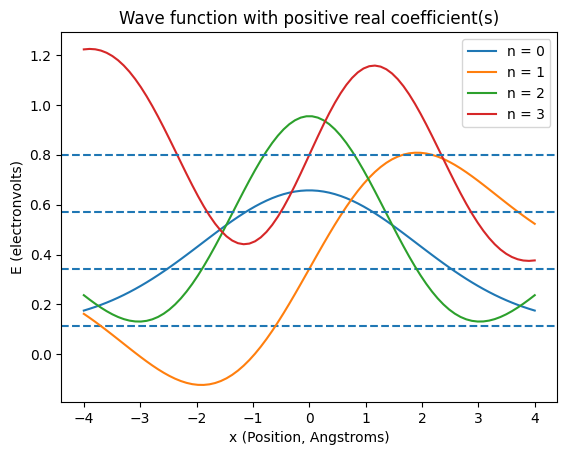

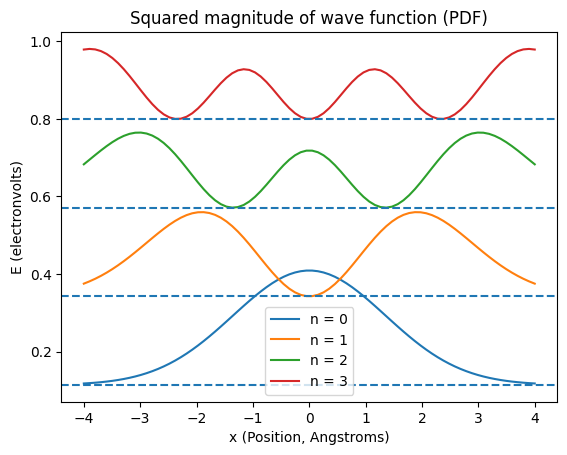

In [48]:
for e_lvl in energy_levels:
    # Convert Joules to electronvolts
    energy_ev = energies[e_lvl] * 6.241_509_074e18
    # Convert meters to Angstroms (essentially stretch the x-axis by a
    # factor of 1e10)
    eval_points_A = eval_points * 1e10
    # Since we stretched the x-axis by a factor of 1e10, and since we
    # must have that the integral of the squared magnitude of
    # solution_vals[e_lvl] across the interval on which we are solving
    # equals one, we must scale the y-axis by a factor of 1e-5
    sol_vals = solution_vals[e_lvl] * 1e-5
    plt.plot(eval_points_A, sol_vals + energy_ev, label='n = ' + str(e_lvl))
    plt.axhline(y=energy_ev, linestyle='dashed')
plt.xlabel('x (Position, Angstroms)')
plt.ylabel('E (electronvolts)')
plt.title('Wave function with positive real coefficient(s)')
plt.legend()

plt.show()

for e_lvl in energy_levels:
    # Convert Joules to electronvolts
    energy_ev = energies[e_lvl] * 6.241_509_074e18
    # Convert meters to Angstroms (essentially stretch the x-axis by a
    # factor of 1e10)
    eval_points_A = eval_points * 1e10
    # Since we stretched the x-axis by a factor of 1e10, and since we
    # must have that the integral of the squared magnitude of the
    # solution across the interval on which we are solving equals one,
    # we must scale the y-axis by a factor of 1e-10.
    sol_mg_sq = solution_magnitude_squared_vals[e_lvl]*1e-10
    plt.plot(eval_points_A, sol_mg_sq + energy_ev, label='n = ' + str(e_lvl))
    plt.axhline(y=energy_ev, linestyle='dashed')
plt.xlabel('x (Position, Angstroms)')
plt.ylabel('E (electronvolts)')
plt.title('Squared magnitude of wave function (PDF)')
plt.legend()


## Numerical Solution

Instead of solving Schrodinger's equation for the quantum harmonic oscillator analytically, we can instead create a numerical approximation of the solution.

The code below creates and plots numerical approximations of the solution for each energy level in the `energy_levels` list, on the interval `[interval_start, interval_end]` (in Angstroms), using a step size no larger than `max_step_size` (in Angstroms) and initial conditions contained in the `initial_conditions` dictionary, for a particle/quantum harmonic oscillator with a "spring constant" specified by the value of $k$ and a mass (in atomic mass units) specified by the value of `mass`, which has zero potential energy when at the point specified by the value of `x_0` (in Angstroms). The numerical approximation is created using SciPy's [solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) function. If `also_plot_analytic` is `True`, then this will also find and plot the corresponding analytic solutions using the code above. 

(Note that if `initial_conditions` is left as `None`, then regardless of the value of `also_plot_analytic`, the analytic solutions will be found and used to calculate initial conditions.)

**Note:** If `also_plot_analytic` is `True` or if `initial_conditions` is `None`, then the cells in the **Plot Analytic Solution** section **must** be run before the cells below can be executed.

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from sympy import sqrt

# If this is True, this will also compute and plot the numeric solutions
# along with the numeric approximations, to evaluate the accuracy of the
# latter.
also_plot_analytic = False

# The Energy levels for which to plot the solution, which must be
# nonnegative integers
energy_levels = [0, 1, 2, 3,]
# Mass of the particle, in atomic mass units (chosen to adequately
# seperate curves in graph)
mass = 0.005
# The "spring constant" in the potential energy function for the
# particle
k = 1
# The x-coordinate of the point at which the particle has zero potential
# energy (in Angstroms)
x_0 = 0

# The lower and upper bounds of the interval on which the solution will
# be evaluated and then plotted (in Angstroms)
interval_start = -4
interval_end = 4

# The maximum step size to use during numerical approximation (in
# Angstroms)
max_step_size = 1 / ((interval_end - interval_start) * 10)

# Convert atomic unics to kilograms
m = mass * 1.660_540_199e-27

# Convert Angstroms to meters
x_0_m = x_0 * 1e-10
interval_lower_bound = interval_start * 1e-10
interval_upper_bound = interval_end * 1e-10
mss_m = max_step_size * 1e-10

# Reduced Planck Constant, in Joule seconds
hbar = 1.054_571_817e-34

# A dictionary mapping energy level numbers to the corresponding results
# of numerical approximation using solve_ivp on the given interval
solution_vals = dict()
# A dictionary mapping energy level numebers to the squared magnitude of
# the corresponding numerical approximations. Created by squaring the
# magnitude of the solution values in solution_vals
solution_magnitude_squared_vals = dict()
# A dictionary mapping energy level numbers to the amount of energy (in
# Joules) that the system has when it is in that energy level.
energies = dict()

if also_plot_analytic:
    # Indentical to those above, but for analytic solutions instead of
    # numeric approximations
    a_sol_vals = dict()
    a_sol_mag_sq_vals = dict()
    number_of_eval_points_a_A = (interval_end - interval_start) * 10
    # If we want number_of_eval_points_a_m evaluation points per
    # Angstrom on the x-axis, then we multiply that by 1e10 to determine
    # how many evaluation points we need per meter.
    number_of_eval_points_a_m = number_of_eval_points_a_A * 1e10
    eval_points = np.linspace(
        interval_lower_bound, interval_upper_bound, number_of_eval_points_a_m)

"""
This should be a dictionary mapping energy levels to 2-tuples.
The first element of each of these 2-tuples should be the initial value 
of psi(x) (evaluated at interval_start) for that particular energy 
level, and the second element should be the initial value of d psi(x)/dx
(evaluated at interval_start) for that particular energy level as well.

So for example, if we have interval_start = -3 and we are solving for 
energy level 0, then our initial conditions might be, for example, 
psi(-3) = 1 and d psi(-3)/dx = 4. In this case, we would type:

```
initial_conditions = {
    0: (1, 4)
}
```

(Don't actually use those values, this is just an example.)
If initial_conditions is left as None, then this will calculate the 
actual, analytical solution and its derivative, evaluate them at 
interval_start, and then use these as the initial conditions. Note that 
this will take more time (perhaps several minutes more if you are 
solving energy levels greater than 4) and totally defeats the purpose of
solving numerically.
"""
initial_conditions = None

if initial_conditions == None:
    initial_conditions = dict()
    for e_lvl in energy_levels:
        sol, x, x_0_symb, alpha = create_normalized_solution(
            energy_level=e_lvl, first_coef_def_pos=True)
        sol = sol.subs({
            x_0_symb: x_0_m,
            alpha: sqrt(hbar/(m*sqrt(k/m)))
        })
        psi_iv = sol.subs({
            x: interval_lower_bound,
            x_0_symb: x_0_m,
            alpha: sqrt(hbar/(m*sqrt(k/m)))
        }).evalf()
        d_psi_dx_iv = sol.diff(x).subs({
            x: interval_lower_bound,
            x_0_symb: x_0_m,
            alpha: sqrt(hbar/(m*sqrt(k/m)))
        }).evalf()
        initial_conditions[e_lvl] = (psi_iv, d_psi_dx_iv)
else:
    for key, pair in initial_conditions.items():
        # By converting the x-axis from Angstroms to meters, we are
        # essentially compressing it by a factor of 1e10. However, since
        # we must have that the integral of the squared magnitude of the
        # solution across the interval on which we are solving equals
        # one, we must scale the y-axis of the solution (and thus also
        # its first and second derivatives) by a factor of 1e5
        converted_pair = (pair[0] * 1e5, pair[1] * 1e5)
        initial_conditions[key] = converted_pair

for e_lvl in energy_levels:
    def diff_eq_for_scipy(x, psi_and_d_psi_dx):
        # The first element in the list psi_and_d_psi_dx will be the
        # previous psi value, and the second will be the previous
        # d_psi_dx_value
        scnd_deriv = ((k*m/hbar**2)*(x-x_0_m)**2 - sqrt(k*m)
                      * (e_lvl+0.5)*2/hbar)*psi_and_d_psi_dx[0]
        return [psi_and_d_psi_dx[1], scnd_deriv]
    solution_vals[e_lvl] = solve_ivp(diff_eq_for_scipy,
                                     [interval_lower_bound,
                                      interval_upper_bound],
                                     [initial_conditions[e_lvl][0],
                                      initial_conditions[e_lvl][1]],
                                     max_step=mss_m)
    solution_magnitude_squared_vals[e_lvl] = np.square(solution_vals[e_lvl]
                                                       .y[0, :])
    energies[e_lvl] = hbar*sqrt(k/m)*(e_lvl + 0.5)

if also_plot_analytic:
    compute_solution(a_sol_vals, a_sol_mag_sq_vals,
                     energies, energy_levels, hbar, m, k, x_0_m, eval_points)


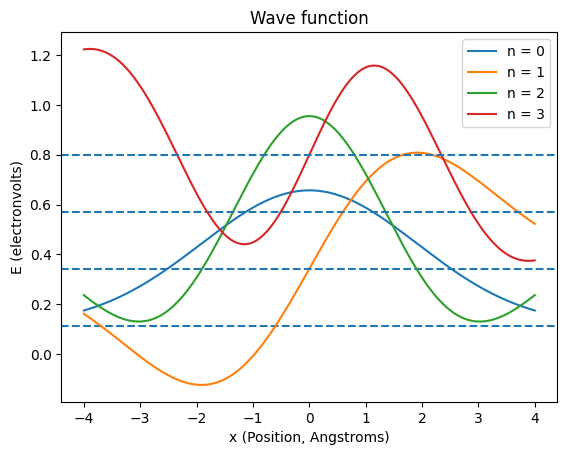

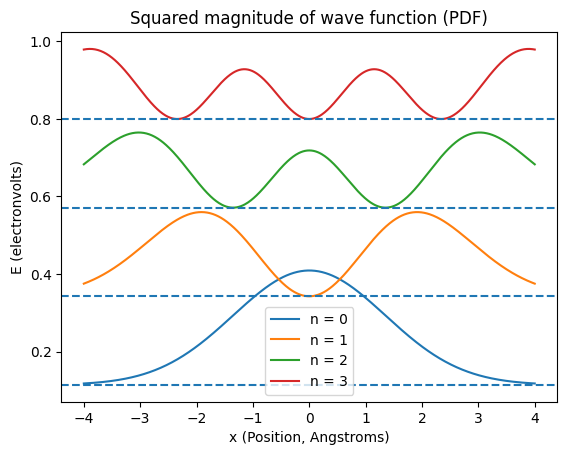

In [52]:
for e_lvl in energy_levels:
    # Convert Joules to electronvolts
    energy_ev = energies[e_lvl] * 6.241_509_074e18
    if also_plot_analytic:
        # Convert meters to Angstroms (essentially undoing the earlier
        # compression of the x-axis by a factor of 1e-10)
        eval_points_A = eval_points * 1e10
        # Undo our stretch of the y-axis by a factor of 1e5
        sol_vals_compr = a_sol_vals[e_lvl] * 1e-5
        plt.plot(eval_points_A, sol_vals_compr +
                 energy_ev, label='n = ' + str(e_lvl) + ', analytic')
    # Convert meters to Angstroms (same as above)
    indep_var_vals = solution_vals[e_lvl].t * 1e10
    # Undo stretch (same as above)
    sol_val_compr = solution_vals[e_lvl].y[0, :] * 1e-5
    plt.plot(indep_var_vals, sol_val_compr +
             energy_ev, label='n = ' + str(e_lvl))
    plt.axhline(y=energy_ev, linestyle='dashed')
plt.xlabel('x (Position, Angstroms)')
plt.ylabel('E (electronvolts)')
plt.title('Wave function')
plt.legend()

plt.show()

for e_lvl in energy_levels:
    # Convert Joules to electronvolts
    energy_ev = energies[e_lvl] * 6.241_509_074e18
    if also_plot_analytic:
        # Convert meters to Angstroms (same as above)
        eval_points_A = eval_points * 1e10
        # Same as above, but 1e-10 instead of 1e-5 since this is the
        # squared magnitude of the solution
        sol_mag_sq_vals_compr = a_sol_mag_sq_vals[e_lvl] * 1e-10
        plt.plot(eval_points_A, sol_mag_sq_vals_compr +
                 energy_ev, label='n = ' + str(e_lvl) + ', analytic')
    # Convert meters to Angstroms (same as above)
    indep_var_vals = solution_vals[e_lvl].t * 1e10
    # Undo stretch (same as above)
    sol_mag_sq_val_compr = solution_magnitude_squared_vals[e_lvl] * 1e-10
    plt.plot(indep_var_vals, sol_mag_sq_val_compr +
             energy_ev, label='n = ' + str(e_lvl))
    plt.axhline(y=energy_ev, linestyle='dashed')
plt.xlabel('x (Position, Angstroms)')
plt.ylabel('E (electronvolts)')
plt.title('Squared magnitude of wave function (PDF)')
plt.legend()
